In [128]:
import os 
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [129]:
import glob
glob.glob("*.csv")

['submission_format.csv', 'pm25_satellite_metadata.csv', 'train_labels.csv']

In [130]:
import pandas as pd
df = pd.read_csv("scpppi/processed_data_l.csv").drop(columns=["Unnamed: 0"])

In [131]:
df_care = df[["datetime","location","grid_id","value"]]

In [132]:
df_f = df.groupby(["location","datetime"]).mean().reset_index()#["delhi"]

In [133]:
df_f = pd.read_csv("scpppi/processed_data_l.csv").drop(columns=["Unnamed: 0"])
df_f

,datetime,grid_id,value,datetime_dt,location,date,granule_id,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01T08:00:00Z,3S31A,11.400000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
1,2018-02-01T08:00:00Z,A2FBI,17.000000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
2,2018-02-01T08:00:00Z,DJN0F,11.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
3,2018-02-01T08:00:00Z,E5P9N,22.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
4,2018-02-01T08:00:00Z,FRITQ,29.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,2018-04-17T18:30:00Z,GVQXS,99.512500,2018-04-17 18:30:00+00:00,Delhi,2018-04-17,20180417T054000_maiac_dl_0.hdf,-0.558915,0.114815,-0.115747,...,0.264831,0.053901,-0.015675,-1.457609,-0.201804,1.673072,0.098791,-0.088350,0.033447,0.349728
39446,2018-04-18T18:30:00Z,GVQXS,101.068421,2018-04-18 18:30:00+00:00,Delhi,2018-04-18,20180418T062500_maiac_dl_0.hdf,-0.559187,0.114805,-0.115720,...,0.489858,0.167527,0.171734,-1.609516,-0.328245,2.009907,0.279684,-0.188551,0.195535,0.687512
39447,2018-04-19T18:30:00Z,GVQXS,157.216667,2018-04-19 18:30:00+00:00,Delhi,2018-04-19,20180419T071000_maiac_dl_0.hdf,-0.559288,0.114813,-0.115717,...,0.545289,0.176183,0.194046,-2.109934,-0.471108,2.846452,0.338701,-0.290326,0.215849,0.861582
39448,2018-04-25T18:30:00Z,GVQXS,149.870833,2018-04-25 18:30:00+00:00,Delhi,2018-04-25,20180425T063000_maiac_dl_0.hdf,-0.559169,0.114806,-0.115722,...,0.347554,0.149098,0.092506,-1.631960,-0.273409,1.804072,0.200571,-0.107857,0.128037,0.509230


In [134]:
delhi = df_f[df_f["location"]=='Delhi']

In [135]:
set(df_f["location"])

{'Delhi', 'Los Angeles (SoCAB)', 'Taipei'}

In [136]:
df_f

,datetime,grid_id,value,datetime_dt,location,date,granule_id,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01T08:00:00Z,3S31A,11.400000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
1,2018-02-01T08:00:00Z,A2FBI,17.000000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
2,2018-02-01T08:00:00Z,DJN0F,11.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
3,2018-02-01T08:00:00Z,E5P9N,22.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
4,2018-02-01T08:00:00Z,FRITQ,29.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,2018-04-17T18:30:00Z,GVQXS,99.512500,2018-04-17 18:30:00+00:00,Delhi,2018-04-17,20180417T054000_maiac_dl_0.hdf,-0.558915,0.114815,-0.115747,...,0.264831,0.053901,-0.015675,-1.457609,-0.201804,1.673072,0.098791,-0.088350,0.033447,0.349728
39446,2018-04-18T18:30:00Z,GVQXS,101.068421,2018-04-18 18:30:00+00:00,Delhi,2018-04-18,20180418T062500_maiac_dl_0.hdf,-0.559187,0.114805,-0.115720,...,0.489858,0.167527,0.171734,-1.609516,-0.328245,2.009907,0.279684,-0.188551,0.195535,0.687512
39447,2018-04-19T18:30:00Z,GVQXS,157.216667,2018-04-19 18:30:00+00:00,Delhi,2018-04-19,20180419T071000_maiac_dl_0.hdf,-0.559288,0.114813,-0.115717,...,0.545289,0.176183,0.194046,-2.109934,-0.471108,2.846452,0.338701,-0.290326,0.215849,0.861582
39448,2018-04-25T18:30:00Z,GVQXS,149.870833,2018-04-25 18:30:00+00:00,Delhi,2018-04-25,20180425T063000_maiac_dl_0.hdf,-0.559169,0.114806,-0.115722,...,0.347554,0.149098,0.092506,-1.631960,-0.273409,1.804072,0.200571,-0.107857,0.128037,0.509230


In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TransformerModel, ExponentialSmoothing
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

In [138]:
df.datetime_dt = pd.to_datetime(df.datetime_dt)

In [260]:
df=df.sort_values("datetime_dt")

In [261]:
df

,datetime,grid_id,value,datetime_dt,location,date,granule_id,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01T08:00:00Z,3S31A,11.400000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.35959,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
5,2018-02-01T08:00:00Z,H96P6,12.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.35959,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
1,2018-02-01T08:00:00Z,A2FBI,17.000000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.35959,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
2,2018-02-01T08:00:00Z,DJN0F,11.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.35959,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
4,2018-02-01T08:00:00Z,FRITQ,29.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.35959,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37206,2020-12-31T18:30:00Z,CPR0W,291.591111,2020-12-31 18:30:00+00:00,Delhi,2020-12-31,20201231T065000_maiac_dl_0.hdf,-0.550824,0.114607,-0.116819,...,0.36301,0.120672,0.057451,-1.632876,-0.267747,2.382530,0.165578,-0.107178,0.093735,0.441788
37207,2020-12-31T18:30:00Z,IUMEZ,529.604348,2020-12-31 18:30:00+00:00,Delhi,2020-12-31,20201231T065000_maiac_dl_0.hdf,-0.550824,0.114607,-0.116819,...,0.36301,0.120672,0.057451,-1.632876,-0.267747,2.382530,0.165578,-0.107178,0.093735,0.441788
37198,2020-12-31T18:30:00Z,P8JA5,368.611111,2020-12-31 18:30:00+00:00,Delhi,2020-12-31,20201231T065000_maiac_dl_0.hdf,-0.550824,0.114607,-0.116819,...,0.36301,0.120672,0.057451,-1.632876,-0.267747,2.382530,0.165578,-0.107178,0.093735,0.441788
37199,2020-12-31T18:30:00Z,D72OT,298.000000,2020-12-31 18:30:00+00:00,Delhi,2020-12-31,20201231T065000_maiac_dl_0.hdf,-0.550824,0.114607,-0.116819,...,0.36301,0.120672,0.057451,-1.632876,-0.267747,2.382530,0.165578,-0.107178,0.093735,0.441788


In [297]:
test_set = df[-5000:]

In [298]:
train_set = df[:-5000]

In [299]:
train_set

,datetime,grid_id,value,datetime_dt,location,date,granule_id,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01T08:00:00Z,3S31A,11.400000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
5,2018-02-01T08:00:00Z,H96P6,12.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
1,2018-02-01T08:00:00Z,A2FBI,17.000000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
2,2018-02-01T08:00:00Z,DJN0F,11.100000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
4,2018-02-01T08:00:00Z,FRITQ,29.800000,2018-02-01 08:00:00+00:00,Los Angeles (SoCAB),2018-02-01,20180201T191000_maiac_la_0.hdf,-0.563344,0.109907,-0.103034,...,0.359590,0.078313,0.110558,-0.419551,0.000412,0.370398,0.173842,0.051538,0.155408,0.161475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20018,2020-09-22T16:00:00Z,XJF9O,10.434783,2020-09-22 16:00:00+00:00,Taipei,2020-09-22,20200922T022000_maiac_tpe_0.hdf,-0.555606,0.114710,-0.116036,...,0.345278,0.146072,0.152574,-0.075054,0.126443,0.502018,0.199849,0.260203,0.176490,-0.221525
20013,2020-09-22T16:00:00Z,1X116,9.478261,2020-09-22 16:00:00+00:00,Taipei,2020-09-22,20200922T022000_maiac_tpe_0.hdf,-0.555606,0.114710,-0.116036,...,0.345278,0.146072,0.152574,-0.075054,0.126443,0.502018,0.199849,0.260203,0.176490,-0.221525
20019,2020-09-22T16:00:00Z,XNLVD,9.173913,2020-09-22 16:00:00+00:00,Taipei,2020-09-22,20200922T022000_maiac_tpe_0.hdf,-0.555606,0.114710,-0.116036,...,0.345278,0.146072,0.152574,-0.075054,0.126443,0.502018,0.199849,0.260203,0.176490,-0.221525
20009,2020-09-22T16:00:00Z,KW43U,10.434783,2020-09-22 16:00:00+00:00,Taipei,2020-09-22,20200922T035500_maiac_tpe_0.hdf,-0.554215,0.114670,-0.116231,...,0.364946,0.114394,0.184636,-0.047306,0.100186,0.237310,0.228432,0.179253,0.198205,-0.075413


In [300]:

from darts.metrics import rmse

In [301]:
# just_time = train_set[[]]

In [302]:
from sklearn.preprocessing import MinMaxScaler

In [303]:
scaler = MinMaxScaler()

In [304]:
train_set["value"] = scaler.fit_transform(train_set["value"].values.reshape(-1, 1)).flatten()

In [305]:
test_set["value"] = scaler.transform(test_set["value"].values.reshape(-1, 1)).flatten()

In [306]:
gp = train_set.groupby(["location","datetime_dt"]).mean().reset_index()
gp

,location,datetime_dt,value,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,Delhi,2018-02-01 18:30:00+00:00,0.122276,-0.551273,0.114632,-0.116517,0.256812,-0.049742,0.242454,-0.583831,...,0.317928,0.126096,0.076979,-0.738119,-0.061965,1.151008,0.152429,0.113224,0.122059,0.041072
1,Delhi,2018-02-02 18:30:00+00:00,0.097329,-0.551246,0.114629,-0.116517,0.256808,-0.049747,0.242449,-0.583805,...,0.259751,0.076953,0.008049,-1.105945,-0.095937,1.087141,0.095297,0.026883,0.061390,0.179741
2,Delhi,2018-02-03 18:30:00+00:00,0.126750,-0.551259,0.114629,-0.116516,0.256810,-0.049745,0.242451,-0.583817,...,0.274583,0.070187,0.071022,-0.452270,-0.011966,0.540502,0.146733,0.095356,0.117028,0.028600
3,Delhi,2018-02-04 18:30:00+00:00,0.143346,-0.551218,0.114627,-0.116517,0.256808,-0.049748,0.242442,-0.583780,...,0.283971,0.125678,0.070656,-1.180014,-0.157611,1.204440,0.165072,-0.022363,0.107856,0.344290
4,Delhi,2018-02-05 18:30:00+00:00,0.122572,-0.550950,0.114612,-0.116714,0.256732,-0.049750,0.242378,-0.583541,...,0.251722,0.077413,0.091258,-0.302206,0.030239,-0.487758,0.136549,0.123913,0.135296,0.030753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Taipei,2020-09-18 16:00:00+00:00,0.011068,-0.554331,0.112884,-0.109938,0.256958,-0.051059,0.245738,-0.592808,...,0.220081,0.079235,0.102959,0.105163,0.172203,-0.377820,0.131789,0.235534,0.120873,-0.175061
2236,Taipei,2020-09-19 16:00:00+00:00,0.007072,-0.559544,0.115074,-0.115642,0.257637,-0.048989,0.244060,-0.592116,...,0.270704,0.113604,0.135354,-0.049698,0.137758,-0.056124,0.179134,0.210224,0.151192,-0.081103
2237,Taipei,2020-09-20 16:00:00+00:00,0.011976,-0.559701,0.111075,-0.112775,0.255780,-0.050474,0.243677,-0.596294,...,0.388315,0.129175,0.166889,-0.327175,0.064000,0.868683,0.243677,0.157202,0.186601,-0.003702
2238,Taipei,2020-09-21 16:00:00+00:00,0.011449,-0.555256,0.114667,-0.116040,0.256974,-0.049668,0.243113,-0.587671,...,0.422369,0.126176,0.188143,-0.263258,0.055094,0.733375,0.248518,0.138743,0.204658,-0.018457


In [307]:
gp = gp[gp["location"]=="Delhi"].drop(columns = ["location"])

In [308]:
gp2 = test_set.groupby(["location","datetime_dt"]).mean().reset_index()
gp2 = gp2[gp2["location"]=="Delhi"].drop(columns = ["location"])

In [309]:

def clean_df(df):
    df = df.drop(columns=["datetime","granule_id"])
    df["datetime_dt"] = pd.to_datetime(df["datetime_dt"] )
    df["month"] = [i.month for i in df["datetime_dt"]]
    df["month"] = df["month"].astype(str).astype("category")
    one_hot = pd.get_dummies(df["month"])
    df = df.join(one_hot)
    df = df.drop('month',axis = 1)
    df = df.drop('date',axis = 1)
    one_hot = pd.get_dummies(df["location"])
    df = df.join(one_hot)
    one_hot = pd.get_dummies(df["grid_id"])
    df = df.join(one_hot)
    df = df.drop('grid_id',axis = 1)
    df = df.drop('location',axis = 1)
    return df

In [310]:
# train_set = clean_df(train_set)
# test_set = clean_df(test_set)

In [311]:
# train_set

In [312]:
gp

,datetime_dt,value,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01 18:30:00+00:00,0.122276,-0.551273,0.114632,-0.116517,0.256812,-0.049742,0.242454,-0.583831,-0.107478,...,0.317928,0.126096,0.076979,-0.738119,-0.061965,1.151008,0.152429,0.113224,0.122059,0.041072
1,2018-02-02 18:30:00+00:00,0.097329,-0.551246,0.114629,-0.116517,0.256808,-0.049747,0.242449,-0.583805,-0.107475,...,0.259751,0.076953,0.008049,-1.105945,-0.095937,1.087141,0.095297,0.026883,0.061390,0.179741
2,2018-02-03 18:30:00+00:00,0.126750,-0.551259,0.114629,-0.116516,0.256810,-0.049745,0.242451,-0.583817,-0.107476,...,0.274583,0.070187,0.071022,-0.452270,-0.011966,0.540502,0.146733,0.095356,0.117028,0.028600
3,2018-02-04 18:30:00+00:00,0.143346,-0.551218,0.114627,-0.116517,0.256808,-0.049748,0.242442,-0.583780,-0.107473,...,0.283971,0.125678,0.070656,-1.180014,-0.157611,1.204440,0.165072,-0.022363,0.107856,0.344290
4,2018-02-05 18:30:00+00:00,0.122572,-0.550950,0.114612,-0.116714,0.256732,-0.049750,0.242378,-0.583541,-0.107493,...,0.251722,0.077413,0.091258,-0.302206,0.030239,-0.487758,0.136549,0.123913,0.135296,0.030753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,2020-09-17 18:30:00+00:00,0.040386,-0.555687,0.114699,-0.116021,0.257016,-0.049600,0.243179,-0.588023,-0.107505,...,0.401198,0.128342,0.186861,-0.185795,0.079305,0.832128,0.244295,0.181642,0.198727,-0.056014
651,2020-09-18 18:30:00+00:00,0.057362,-0.555532,0.114708,-0.116037,0.257007,-0.049569,0.243167,-0.587876,-0.107531,...,0.229548,0.089339,0.084306,0.057216,0.173230,0.176146,0.126290,0.260152,0.111856,-0.251205
652,2020-09-19 18:30:00+00:00,0.065251,-0.555439,0.114695,-0.116037,0.256994,-0.049597,0.243139,-0.587776,-0.107511,...,0.197320,0.056742,0.041619,-0.179456,0.147359,0.057013,0.087363,0.204494,0.074156,-0.169332
653,2020-09-20 18:30:00+00:00,0.060114,-0.555685,0.114708,-0.116026,0.257020,-0.049578,0.243186,-0.588019,-0.107521,...,0.204536,0.059199,0.078202,0.211205,0.192919,-0.231370,0.116765,0.253990,0.106644,-0.261794


In [313]:
gp2

,datetime_dt,value,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2020-09-22 18:30:00+00:00,0.027570,-0.554449,0.114683,-0.116226,0.256934,-0.049619,0.242972,-0.586849,-0.107520,...,0.191617,0.055442,0.080320,0.181378,0.187668,-0.562756,0.106847,0.240977,0.103916,-0.223991
1,2020-09-23 18:30:00+00:00,0.032549,-0.555727,0.114704,-0.116022,0.257021,-0.049594,0.243187,-0.588061,-0.107510,...,0.441220,0.120175,0.187029,-0.301045,0.046608,1.022361,0.263429,0.125604,0.203094,0.021269
2,2020-09-24 18:30:00+00:00,0.064034,-0.555500,0.114697,-0.116035,0.257004,-0.049601,0.243147,-0.587839,-0.107509,...,0.376854,0.125155,0.173492,-0.371032,0.043341,0.999671,0.243364,0.109591,0.176500,0.117281
3,2020-09-25 18:30:00+00:00,0.056606,-0.555586,0.114703,-0.116034,0.257005,-0.049576,0.243172,-0.587918,-0.107526,...,0.306415,0.133052,0.146293,0.128905,0.170575,0.278174,0.186416,0.277789,0.169333,-0.257214
4,2020-09-26 18:30:00+00:00,0.037686,-0.555626,0.114703,-0.116032,0.257011,-0.049585,0.243176,-0.587964,-0.107515,...,0.267349,0.096924,0.120774,0.140957,0.178086,0.219787,0.166993,0.260001,0.144937,-0.224476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2020-12-27 18:30:00+00:00,0.110888,-0.550883,0.114608,-0.116813,0.256709,-0.049742,0.242355,-0.583481,-0.107509,...,0.217060,0.067973,0.051894,-0.559087,-0.024874,-0.192141,0.105432,0.072550,0.093313,0.116519
97,2020-12-28 18:30:00+00:00,0.123354,-0.550927,0.114610,-0.116813,0.256719,-0.049737,0.242355,-0.583516,-0.107513,...,0.576926,0.129304,0.125282,-2.302340,-0.448291,3.468719,0.259061,-0.318553,0.147064,0.828905
98,2020-12-29 18:30:00+00:00,0.129986,-0.550893,0.114611,-0.116818,0.256719,-0.049735,0.242353,-0.583491,-0.107514,...,0.489097,0.145963,0.136204,-2.192502,-0.468467,3.248156,0.257421,-0.343047,0.137086,0.959801
99,2020-12-30 18:30:00+00:00,0.232935,-0.550872,0.114608,-0.116817,0.256715,-0.049738,0.242348,-0.583465,-0.107512,...,0.392299,0.154431,0.063905,-1.527259,-0.213496,2.291011,0.175928,-0.011330,0.110626,0.291971


In [314]:
gp

,datetime_dt,value,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01 18:30:00+00:00,0.122276,-0.551273,0.114632,-0.116517,0.256812,-0.049742,0.242454,-0.583831,-0.107478,...,0.317928,0.126096,0.076979,-0.738119,-0.061965,1.151008,0.152429,0.113224,0.122059,0.041072
1,2018-02-02 18:30:00+00:00,0.097329,-0.551246,0.114629,-0.116517,0.256808,-0.049747,0.242449,-0.583805,-0.107475,...,0.259751,0.076953,0.008049,-1.105945,-0.095937,1.087141,0.095297,0.026883,0.061390,0.179741
2,2018-02-03 18:30:00+00:00,0.126750,-0.551259,0.114629,-0.116516,0.256810,-0.049745,0.242451,-0.583817,-0.107476,...,0.274583,0.070187,0.071022,-0.452270,-0.011966,0.540502,0.146733,0.095356,0.117028,0.028600
3,2018-02-04 18:30:00+00:00,0.143346,-0.551218,0.114627,-0.116517,0.256808,-0.049748,0.242442,-0.583780,-0.107473,...,0.283971,0.125678,0.070656,-1.180014,-0.157611,1.204440,0.165072,-0.022363,0.107856,0.344290
4,2018-02-05 18:30:00+00:00,0.122572,-0.550950,0.114612,-0.116714,0.256732,-0.049750,0.242378,-0.583541,-0.107493,...,0.251722,0.077413,0.091258,-0.302206,0.030239,-0.487758,0.136549,0.123913,0.135296,0.030753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,2020-09-17 18:30:00+00:00,0.040386,-0.555687,0.114699,-0.116021,0.257016,-0.049600,0.243179,-0.588023,-0.107505,...,0.401198,0.128342,0.186861,-0.185795,0.079305,0.832128,0.244295,0.181642,0.198727,-0.056014
651,2020-09-18 18:30:00+00:00,0.057362,-0.555532,0.114708,-0.116037,0.257007,-0.049569,0.243167,-0.587876,-0.107531,...,0.229548,0.089339,0.084306,0.057216,0.173230,0.176146,0.126290,0.260152,0.111856,-0.251205
652,2020-09-19 18:30:00+00:00,0.065251,-0.555439,0.114695,-0.116037,0.256994,-0.049597,0.243139,-0.587776,-0.107511,...,0.197320,0.056742,0.041619,-0.179456,0.147359,0.057013,0.087363,0.204494,0.074156,-0.169332
653,2020-09-20 18:30:00+00:00,0.060114,-0.555685,0.114708,-0.116026,0.257020,-0.049578,0.243186,-0.588019,-0.107521,...,0.204536,0.059199,0.078202,0.211205,0.192919,-0.231370,0.116765,0.253990,0.106644,-0.261794


In [315]:
# la =df_f[df_f["location"]=='Delhi'].reset_index().drop(columns=["index","grid_id",'datetime_dt','granule_id','date'])
# # la["datetime"]= pd.to_datetime(la["datetime"])
# la.head()

In [316]:
# la = la.groupby(["datetime","location"]).mean().reset_index()

In [317]:
# la["value"].plot()

In [318]:
# la = la.reset_index().drop(columns=["index","location"])

In [319]:
extra = list(gp.columns[2:])
extra[:]

['AOD at 0.47 micron_0',
 'AOD at 0.47 micron_1',
 'AOD at 0.47 micron_2',
 'AOD at 0.47 micron_3',
 'AOD at 0.47 micron_4',
 'AOD at 0.47 micron_5',
 'AOD at 0.47 micron_6',
 'AOD at 0.47 micron_7',
 'AOD at 0.47 micron_8',
 'AOD at 0.47 micron_9',
 'AOD at 0.47 micron_10',
 'AOD at 0.47 micron_11',
 'AOD at 0.47 micron_12',
 'AOD at 0.47 micron_13',
 'AOD at 0.47 micron_14',
 'AOD at 0.47 micron_15',
 'AOD at 0.47 micron_16',
 'AOD at 0.47 micron_17',
 'AOD at 0.47 micron_18',
 'AOD at 0.47 micron_19',
 'AOD at 0.47 micron_20',
 'AOD at 0.47 micron_21',
 'AOD at 0.47 micron_22',
 'AOD at 0.47 micron_23',
 'AOD at 0.47 micron_24',
 'AOD at 0.47 micron_25',
 'AOD at 0.47 micron_26',
 'AOD at 0.47 micron_27',
 'AOD at 0.47 micron_28',
 'AOD at 0.47 micron_29',
 'AOD at 0.47 micron_30',
 'AOD at 0.47 micron_31',
 'AOD at 0.47 micron_32',
 'AOD at 0.47 micron_33',
 'AOD at 0.47 micron_34',
 'AOD at 0.47 micron_35',
 'AOD at 0.47 micron_36',
 'AOD at 0.47 micron_37',
 'AOD at 0.47 micron_3

In [320]:
# la_p = la#[["datetime","value"]]
# la_p.head(1)

In [321]:
from prophet import Prophet
gp.columns = ["ds","y"]+extra
gp2.columns = ["ds","y"]+extra

In [322]:
la = train_set

In [323]:
gp["ds"] = pd.to_datetime(gp["ds"])
gp2["ds"] = pd.to_datetime(gp2["ds"])

In [324]:
gp["ds"]= gp["ds"].dt.tz_localize(None)

In [325]:
gp2["ds"]= gp2["ds"].dt.tz_localize(None)

In [326]:
# test_set.columns = ["ds","y"]+extra
# test_set["ds"] = pd.to_datetime(test_set["ds"])
# test_set["ds"] = test_set["ds"].dt.tz_localize(None)

In [327]:
gp2.head()

,ds,y,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2020-09-22 18:30:00,0.027570,-0.554449,0.114683,-0.116226,0.256934,-0.049619,0.242972,-0.586849,-0.107520,...,0.191617,0.055442,0.080320,0.181378,0.187668,-0.562756,0.106847,0.240977,0.103916,-0.223991
1,2020-09-23 18:30:00,0.032549,-0.555727,0.114704,-0.116022,0.257021,-0.049594,0.243187,-0.588061,-0.107510,...,0.441220,0.120175,0.187029,-0.301045,0.046608,1.022361,0.263429,0.125604,0.203094,0.021269
2,2020-09-24 18:30:00,0.064034,-0.555500,0.114697,-0.116035,0.257004,-0.049601,0.243147,-0.587839,-0.107509,...,0.376854,0.125155,0.173492,-0.371032,0.043341,0.999671,0.243364,0.109591,0.176500,0.117281
3,2020-09-25 18:30:00,0.056606,-0.555586,0.114703,-0.116034,0.257005,-0.049576,0.243172,-0.587918,-0.107526,...,0.306415,0.133052,0.146293,0.128905,0.170575,0.278174,0.186416,0.277789,0.169333,-0.257214
4,2020-09-26 18:30:00,0.037686,-0.555626,0.114703,-0.116032,0.257011,-0.049585,0.243176,-0.587964,-0.107515,...,0.267349,0.096924,0.120774,0.140957,0.178086,0.219787,0.166993,0.260001,0.144937,-0.224476


In [328]:
gp.head(1)

,ds,y,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,cosine of Solar Zenith Angle_246,cosine of Solar Zenith Angle_247,cosine of Solar Zenith Angle_248,cosine of Solar Zenith Angle_249,cosine of Solar Zenith Angle_250,cosine of Solar Zenith Angle_251,cosine of Solar Zenith Angle_252,cosine of Solar Zenith Angle_253,cosine of Solar Zenith Angle_254,cosine of Solar Zenith Angle_255
0,2018-02-01 18:30:00,0.122276,-0.551273,0.114632,-0.116517,0.256812,-0.049742,0.242454,-0.583831,-0.107478,...,0.317928,0.126096,0.076979,-0.738119,-0.061965,1.151008,0.152429,0.113224,0.122059,0.041072


In [329]:
m = Prophet(daily_seasonality=False,yearly_seasonality=True)


In [330]:
for i in extra:
    m.add_regressor(i)

In [331]:
gp = gp.sort_values("ds")

In [332]:
m.fit(gp)

Initial log joint probability = -11.2591


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1355.81      0.013052       5015.61           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1414.71    0.00155328       2573.32           1           1      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1458.06    0.00387607       3520.17           1           1      331   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1484.94   0.000842043       2161.25           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1525.48    0.00559604       6908.01           1           1      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [339]:
# test.drop(columns=["y"])

In [333]:
future = m.make_future_dataframe(periods=365)
future.tail()

lpha0  # evals  Notes 
    8999       2218.04   0.000216453       3386.34        0.53        0.53     9628   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9099       2228.57   0.000952097       10978.8      0.2261      0.2261     9732   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9199       2271.61     0.0091393       14569.2      0.3968      0.3968     9842   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9299       2329.37   7.00226e-05       5717.52           1           1     9952   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9399       2338.56    0.00108364       17683.4           1           1    10055   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    9499       2347.69   0.000132313       4855.46           1           1    1016

,ds
1015,2021-09-17 18:30:00
1016,2021-09-18 18:30:00
1017,2021-09-19 18:30:00
1018,2021-09-20 18:30:00
1019,2021-09-21 18:30:00


In [334]:
test

,ds,y,AOD at 0.47 micron_0,AOD at 0.47 micron_1,AOD at 0.47 micron_2,AOD at 0.47 micron_3,AOD at 0.47 micron_4,AOD at 0.47 micron_5,AOD at 0.47 micron_6,AOD at 0.47 micron_7,...,VR4WG,VYH7U,WT52R,WZNCR,X5DKW,XJF9O,XNLVD,YHOPV,ZP1FZ,ZZ8JF
39377,1970-01-01,2018-10-11 18:30:00+00:00,-0.548896,0.114541,-0.116940,0.256520,-0.049804,0.242046,-0.581547,-0.107392,...,0,0,0,0,0,0,0,0,0,0
39378,1970-01-01,2018-10-11 18:30:00+00:00,-0.548896,0.114541,-0.116940,0.256520,-0.049804,0.242046,-0.581547,-0.107392,...,0,0,0,0,0,0,0,0,0,0
39375,1970-01-01,2018-10-11 18:30:00+00:00,-0.548896,0.114541,-0.116940,0.256520,-0.049804,0.242046,-0.581547,-0.107392,...,0,0,0,0,0,0,0,0,0,0
2623,1970-01-01,2018-10-12 08:00:00+00:00,-0.254091,0.036634,-0.023814,0.146009,-0.041350,0.208953,-0.327767,-0.071169,...,0,0,0,0,0,0,0,0,1,0
2622,1970-01-01,2018-10-12 08:00:00+00:00,-0.254091,0.036634,-0.023814,0.146009,-0.041350,0.208953,-0.327767,-0.071169,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38703,1970-01-01,2018-10-25 18:30:00+00:00,-0.548869,0.114542,-0.116941,0.256519,-0.049801,0.242043,-0.581523,-0.107394,...,0,1,0,0,0,0,0,0,0,0
38701,1970-01-01,2018-10-25 18:30:00+00:00,-0.548869,0.114542,-0.116941,0.256519,-0.049801,0.242043,-0.581523,-0.107394,...,0,0,0,0,0,0,0,1,0,0
38697,1970-01-01,2018-10-25 18:30:00+00:00,-0.548869,0.114542,-0.116941,0.256519,-0.049801,0.242043,-0.581523,-0.107394,...,0,0,0,0,0,0,0,0,0,0
38702,1970-01-01,2018-10-25 18:30:00+00:00,-0.548869,0.114542,-0.116941,0.256519,-0.049801,0.242043,-0.581523,-0.107394,...,0,0,0,0,0,0,0,0,0,0


In [335]:
gp2 = gp2.sort_values("ds")

In [336]:
forecast = m.predict(gp2.drop(columns=["y"]))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
96,2020-12-27 18:30:00,0.440816,0.430701,0.450773
97,2020-12-28 18:30:00,0.317386,0.307176,0.327655
98,2020-12-29 18:30:00,0.340378,0.330472,0.350959
99,2020-12-30 18:30:00,0.078794,0.068573,0.088393
100,2020-12-31 18:30:00,0.095170,0.085586,0.106531


In [337]:
forecast["y_real"] = list(gp2["y"])

In [338]:
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<AxesSubplot:>

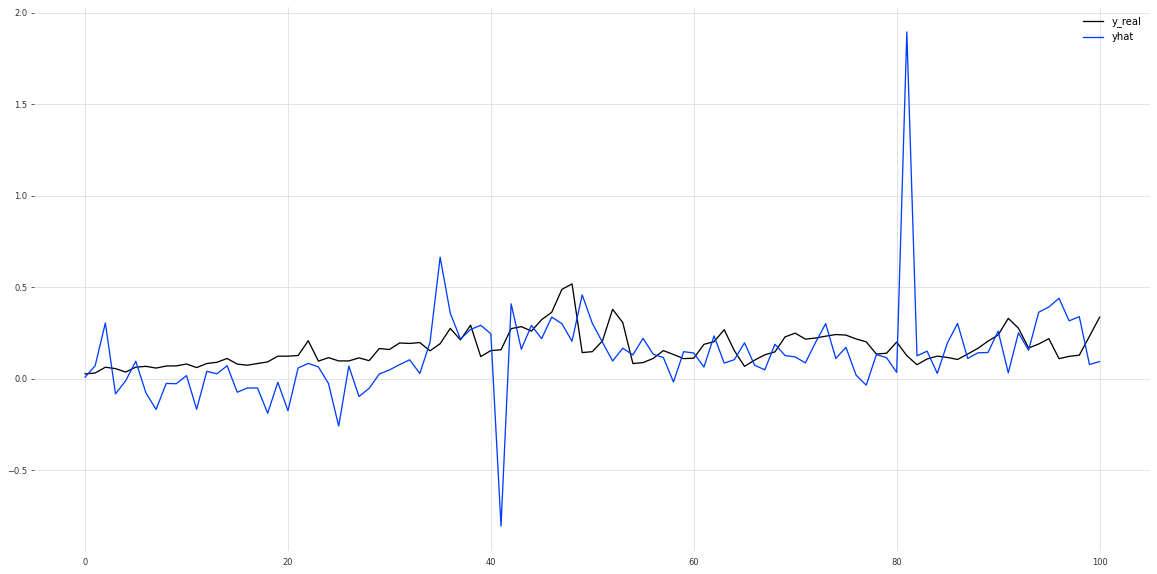

In [339]:
forecast[["y_real","yhat"]].plot(figsize=(20, 10))

In [290]:
listi = scaler.inverse_transform(forecast["yhat"].values.reshape(1,-1))

In [293]:
listi.tolist()[0]

[210.60501378425812,
 145.1911345804067,
 73.73809168810966,
 150.49660705516953,
 300.5050527159143,
 299.42185770044637,
 264.5452449150725,
 287.96347246890014,
 261.44599742172267,
 235.64159744032185,
 238.9021439032492,
 266.57923814072313,
 298.10912232970804,
 263.9733096225952,
 377.81459183928166,
 326.3387423495061,
 230.7994831064387,
 225.81462077761637,
 172.1133856646133,
 127.13890249431748,
 263.40604527170626,
 308.7385369138468,
 223.13312717065287,
 163.01833162527132,
 227.35104440039274,
 172.69840774909477,
 216.49697829375256,
 214.7398255086094,
 -386.2154346338884,
 22.888255493739994,
 236.85638259642093,
 247.7430433141955,
 197.84141533331567,
 206.00349858021713,
 202.9834580709757,
 378.8561002846584,
 253.86744209211795,
 189.86827492920492,
 208.79077498563282,
 215.15251054018628,
 272.90436861488706,
 185.86641881025255,
 35.27790595266147,
 502.84571739054576,
 461.07216859456156,
 497.9417307531807,
 424.3052674554243,
 477.6602239318564,
 468.70998

In [273]:
j = df[5000:].groupby(["location","datetime"]).mean().reset_index()
j = j[j["location"]=="Delhi"]
j["datetime"] = pd.to_datetime(j["datetime"])

In [295]:
list(j["value"])

[213.51462627506638,
 204.37423620326683,
 203.7456794694193,
 250.5898716237508,
 262.97476599448953,
 219.67655658043807,
 240.5385424100191,
 204.74798898121887,
 162.65199324004814,
 107.69678004203443,
 370.94483911509354,
 178.6231256785753,
 181.6749389002595,
 435.8433117842231,
 289.5854548969549,
 293.56020083483526,
 252.9737125978426,
 273.9226436536473,
 263.5752711995599,
 129.98317695925678,
 104.443805137408,
 123.39934667229221,
 135.52872682167472,
 167.7390447376685,
 174.33608458591218,
 121.56646666666667,
 143.08681159420289,
 138.87733333333333,
 253.57517418523142,
 332.63584802817087,
 402.49710957632095,
 367.0215631524694,
 251.4641876978426,
 245.9426800805864,
 294.12753488482855,
 254.36150585609693,
 169.0,
 323.58627193820826,
 133.96,
 195.37010908037183,
 191.17143435192483,
 186.59279193208837,
 59.31,
 42.17,
 35.39,
 97.29466666666666,
 69.76609279215691,
 77.88290256240931,
 83.57514676912339,
 100.5657299233469,
 109.73641093471551,
 74.5947006777

In [271]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z


<AxesSubplot:>

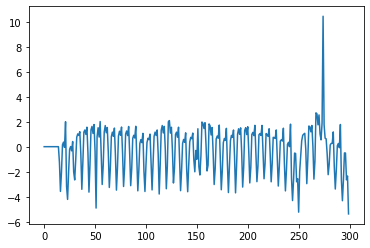

In [366]:
zscore(zscore(forecast["yhat"], 10),5).fillna(0).plot()

In [364]:
zscore(forecast["yhat"], 10)#.plot()#.fillna(0)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
295    0.477254
296    0.297200
297   -0.729451
298   -1.035905
299   -3.366477
Name: yhat, Length: 300, dtype: float64

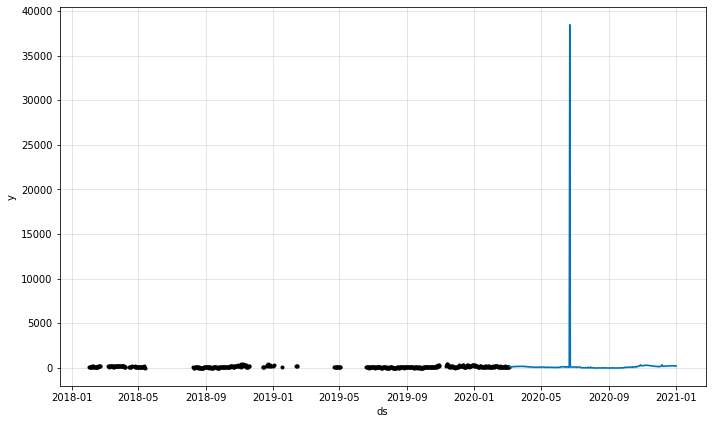

In [335]:
fig1 = m.plot(forecast)


<AxesSubplot:>

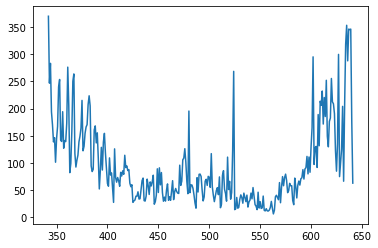

In [284]:
test["y"].plot()

In [11]:
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
# import dataset, network to train and metric to optimize
from pytorch_forecasting import TimeSeriesDataSet, TemporalFusionTransformer, QuantileLoss
import copy
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [12]:
max_encoder_length = 36
max_prediction_length = 60

In [13]:
la["datetime"] = pd.to_datetime(la["datetime"])

In [15]:
la.head()

,location,datetime,value,all_47_0,all_47_1,all_47_2,all_47_3,all_47_4,all_47_5,all_47_6,...,all_55_118,all_55_119,all_55_120,all_55_121,all_55_122,all_55_123,all_55_124,all_55_125,all_55_126,all_55_127
0,Los Angeles (SoCAB),2018-02-01 08:00:00+00:00,14.075000,1.473164,0.237620,-0.450347,0.345416,-0.052419,0.039611,1.318122,...,0.163535,0.088578,-0.003833,0.288825,0.103857,-0.076327,-0.030244,0.008117,-0.141097,-0.066045
1,Los Angeles (SoCAB),2018-02-03 08:00:00+00:00,20.416667,1.987200,0.126942,-0.464041,0.301539,-0.087068,-0.038433,1.730065,...,0.158913,0.029608,0.010519,0.274864,0.095626,-0.171993,0.001440,0.131080,-0.169575,0.134116
2,Los Angeles (SoCAB),2018-02-04 08:00:00+00:00,19.270304,2.212989,0.193803,-0.482930,0.194463,0.085948,-0.124012,2.097894,...,0.198427,0.112452,0.060753,0.271349,0.072343,-0.097413,-0.075271,0.010564,-0.094217,0.030709
3,Los Angeles (SoCAB),2018-02-05 08:00:00+00:00,11.683333,1.987809,0.219807,-0.575178,0.283012,-0.090230,-0.046319,1.837340,...,0.180373,0.122904,0.022543,0.164234,0.084222,-0.102294,-0.071847,-0.153070,-0.218122,0.015092
4,Los Angeles (SoCAB),2018-02-06 08:00:00+00:00,15.727273,2.358978,0.031024,-0.414918,0.091019,-0.074988,-0.110740,2.101708,...,0.163297,0.010990,-0.023368,0.306129,0.024098,-0.083651,-0.106087,-0.021889,-0.018343,-0.051663


In [16]:
data = la

In [17]:
data["time_idx"] = data["datetime"].dt.year * 365 + data["datetime"].dt.month *30 + data["datetime"].dt.day
data["time_idx"] -= data["time_idx"].min()

In [18]:
max_prediction_length = 100
max_encoder_length = 24
training_cutoff = data["time_idx"].max() - max_prediction_length


In [19]:
time_varying_known_reals = list(data.columns[3:])
time_varying_known_reals[0:2]

['all_47_0', 'all_47_1']

In [20]:
data.head()

,location,datetime,value,all_47_0,all_47_1,all_47_2,all_47_3,all_47_4,all_47_5,all_47_6,...,all_55_119,all_55_120,all_55_121,all_55_122,all_55_123,all_55_124,all_55_125,all_55_126,all_55_127,time_idx
0,Los Angeles (SoCAB),2018-02-01 08:00:00+00:00,14.075000,1.473164,0.237620,-0.450347,0.345416,-0.052419,0.039611,1.318122,...,0.088578,-0.003833,0.288825,0.103857,-0.076327,-0.030244,0.008117,-0.141097,-0.066045,0
1,Los Angeles (SoCAB),2018-02-03 08:00:00+00:00,20.416667,1.987200,0.126942,-0.464041,0.301539,-0.087068,-0.038433,1.730065,...,0.029608,0.010519,0.274864,0.095626,-0.171993,0.001440,0.131080,-0.169575,0.134116,2
2,Los Angeles (SoCAB),2018-02-04 08:00:00+00:00,19.270304,2.212989,0.193803,-0.482930,0.194463,0.085948,-0.124012,2.097894,...,0.112452,0.060753,0.271349,0.072343,-0.097413,-0.075271,0.010564,-0.094217,0.030709,3
3,Los Angeles (SoCAB),2018-02-05 08:00:00+00:00,11.683333,1.987809,0.219807,-0.575178,0.283012,-0.090230,-0.046319,1.837340,...,0.122904,0.022543,0.164234,0.084222,-0.102294,-0.071847,-0.153070,-0.218122,0.015092,4
4,Los Angeles (SoCAB),2018-02-06 08:00:00+00:00,15.727273,2.358978,0.031024,-0.414918,0.091019,-0.074988,-0.110740,2.101708,...,0.010990,-0.023368,0.306129,0.024098,-0.083651,-0.106087,-0.021889,-0.018343,-0.051663,5


In [34]:
training = TimeSeriesDataSet(
    data[lambda x: x.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="value",
    group_ids=["location"],
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=[],
    time_varying_known_categoricals=["location"],
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
    ],
    target_normalizer=GroupNormalizer(
        groups=[ "location"], transformation="softplus"
    ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
)

In [35]:
validation = TimeSeriesDataSet.from_dataset(training, data, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

In [36]:
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

5.016037464141846

In [37]:
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Global seed set to 42


RuntimeError: CUDA error: device-side assert triggered

/opt/conda/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1079: LightningDeprecationWarning: `trainer.tune(train_dataloader)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.tune(train_dataloaders)` instead. HINT: added 's'
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /workspace/lr_find_temp_model_b910813f-94b6-4432-b226-0b6c96d6aabc.ckpt


suggested learning rate: 0.025703957827688636


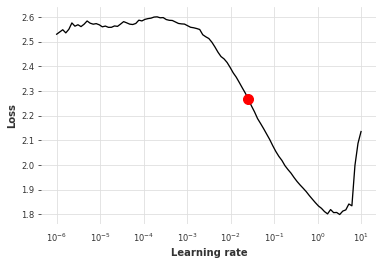

In [111]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()


In [32]:
tft.cuda()

RuntimeError: CUDA error: device-side assert triggered

In [25]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=30,
    gpus=1,
    weights_summary="top",
    gradient_clip_val=0.1,
#     limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Number of parameters in network: 371.7k


In [29]:
trainer.fit(
    tft,
    train_dataloader=train_dataloader,
    val_dataloaders=val_dataloader,
)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


RuntimeError: CUDA error: device-side assert triggered

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [31]:
torch.zeros(1, device=device)

RuntimeError: CUDA error: device-side assert triggered

In [9]:
# la.plot()

In [29]:
from darts import TimeSeries
series = TimeSeries.from_dataframe(la, 'datetime',freq='1D',fill_missing_dates=True,fillna_value=0)
series

<TimeSeries (DataArray) (datetime: 1065, component: 257, sample: 1)>
array([[[ 1.40750000e+01],
        [ 1.47316406e+00],
        [ 2.37619722e-01],
        ...,
        [ 8.11749037e-03],
        [-1.41097450e-01],
        [-6.60453650e-02]],

       [[ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        ...,
        [ 0.00000000e+00],
        [ 0.00000000e+00],
        [ 0.00000000e+00]],

       [[ 2.04166667e+01],
        [ 1.98720002e+00],
        [ 1.26941753e-01],
        ...,
...
        ...,
        [ 2.28037130e-02],
        [-1.50888190e-01],
        [ 1.46438320e-01]],

       [[ 9.90347132e+00],
        [ 2.05950300e+00],
        [ 1.34824990e-01],
        ...,
        [-4.46535500e-02],
        [-7.38721500e-02],
        [ 1.68212320e-02]],

       [[ 1.26434488e+01],
        [ 2.82920892e+00],
        [-2.15811103e-02],
        ...,
        [ 1.01307613e-01],
        [-1.63362884e-01],
        [ 1.32557200e-01]]])
Coordinates:
  * datetime   (datetime) object 1517472000000000000 ... 1609401600000000000
  * component  (component) object 'value' 'all_47_0' ... 'all_55_127'
Dimensions without coordinates: sample

In [30]:
train, val = series[:-300], series[-300:]

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import TransformerModel, ExponentialSmoothing
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset

In [32]:
# Normalize the time series (note: we avoid fitting the transformer on the validation set)
# Change name
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
series_scaled = scaler.transform(series)

In [34]:
# val.pd_series().plot()

In [15]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
my_stopper = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.05,
    mode='min',
)

pl_trainer_kwargs={"callbacks": [my_stopper],"accelerator": "gpu", "gpus":0 }


In [16]:
my_model = TransformerModel(
    input_chunk_length=12,
    output_chunk_length=1,
    batch_size=32,
    n_epochs=200,
    model_name="air_transformer",
    nr_epochs_val_period=10,
    d_model=16,
    nhead=8,
    num_encoder_layers=2,
    num_decoder_layers=2,
    dim_feedforward=128,
    dropout=0.1,
    activation="relu",
    random_state=42,
    save_checkpoints=True,
    force_reset=True,
    torch_device_str= "cuda" 
)

[2022-03-20 19:21:51,257] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-03-20 19:21:51,257] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags


In [17]:
pl_trainer_kwargs

{'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping at 0x7f4bd7efcdf0>],
 'accelerator': 'gpu',
 'gpus': 0}

In [18]:
my_model.fit(series=train_scaled, val_series=val_scaled, verbose=True)

[2022-03-20 19:21:55,704] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 753 samples.
[2022-03-20 19:21:55,704] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 753 samples.
[2022-03-20 19:21:55,731] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-20 19:21:55,731] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-20 19:21:55,741] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-03-20 19:21:55,741] WARNING | darts.models.forecasting.torch_forecasting_model | Depreca

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [20]:
dir(scaler)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit_called',
 '_fit_iterator',
 '_fitted_params',
 '_inverse_transform_iterator',
 '_n_jobs',
 '_name',
 '_reshape_in',
 '_reshape_out',
 '_transform_iterator',
 '_verbose',
 'fit',
 'fit_transform',
 'fitted_params',
 'inverse_transform',
 'name',
 'set_n_jobs',
 'set_verbose',
 'transform',
 'transformer',
 'transformer_instances',
 'ts_fit',
 'ts_inverse_transform',
 'ts_transform']

<AxesSubplot:xlabel='datetime'>

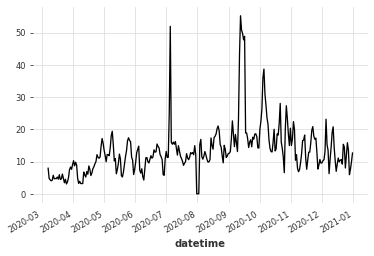

In [28]:
scaler.inverse_transform(val_scaled).pd_series().plot()

In [ ]:
scaler.inverse_transform(my_model.predict(100)).pd_series().plot()

In [27]:
best_model.predict(100)


NameError: name 'best_model' is not defined

In [40]:
from darts.datasets import EnergyDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset


Text(0.5, 1.0, 'Hourly generation hydro run-of-river and poundage')

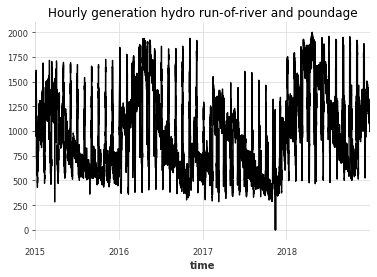

In [41]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

Text(0.5, 1.0, 'Daily generation hydro run-of-river and poundage')

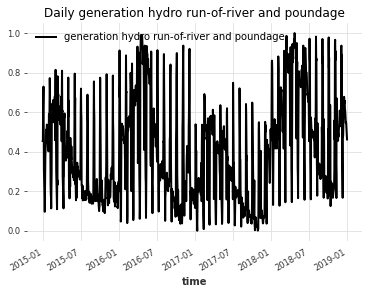

In [42]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")

In [43]:
train, val = series.split_after(pd.Timestamp("20170901"))

In [46]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
    torch_device_str= "cuda" 
)

[2022-03-20 19:33:59,152] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-03-20 19:33:59,152] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags


In [47]:
model_nbeats.fit(train, val_series=val, verbose=True)

[2022-03-20 19:34:00,196] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-03-20 19:34:00,196] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 940 samples.
[2022-03-20 19:34:00,265] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-03-20 19:34:00,265] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 32-bits; casting model to float32.
[2022-03-20 19:34:00,266] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-03-20 19:34:00,266] WARNING | darts.models.forecasting.torch_forecasting_model | Depreca

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [129]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

In [83]:
# prediction

<TimeSeries (DataArray) (datetime: 300, component: 1, sample: 1)>
array([[[13.21174447]],

       [[12.94562075]],

       [[12.41802593]],

       [[12.87148589]],

       [[13.28947566]],

       [[13.28391035]],

       [[12.92012312]],

       [[13.21376536]],

       [[12.94764164]],

       [[12.42004682]],

...

       [[12.9543426 ]],

       [[13.37233236]],

       [[13.36676705]],

       [[13.00297982]],

       [[13.29662207]],

       [[13.03049835]],

       [[12.50290353]],

       [[12.95636349]],

       [[13.37435326]],

       [[13.36878795]]])
Coordinates:
  * datetime   (datetime) object 1583568000000000000 ... 1609401600000000000
  * component  (component) object 'value'
Dimensions without coordinates: sample

TypeError: Plotting requires coordinates to be numeric, boolean, or dates of type numpy.datetime64, datetime.datetime, cftime.datetime or pandas.Interval. Received data of type object instead.

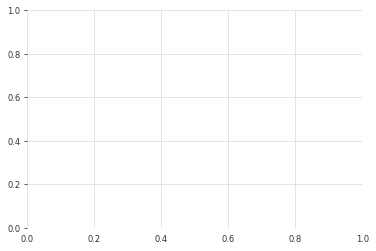

In [62]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()